## Grab all the rookie page URLs

We start with the page with the summary table for all rookies:

In [6]:
url_bball_ref_rookies_2023_24 = 'https://www.basketball-reference.com/leagues/NBA_2024_rookies.html'

In [7]:
from bs4 import BeautifulSoup
import urllib.request

html_page = urllib.request.urlopen(url_bball_ref_rookies_2023_24)
soup = BeautifulSoup(html_page, "html.parser")

temp_all_links = [link.get('href') for link in soup.find("div", {"id": "all_rookies"}).findAll('a')]
rookie_links = [link for link in temp_all_links if link.startswith('/players/') ]

Get totals for each of them:

In [8]:
import pandas as pd
import time


all_rookie_gamelogs = {}

for rookie in rookie_links:
    rookie_codename = rookie.split('/')[-1].replace('.html','')
    url_rookie_page = 'https://www.basketball-reference.com'+rookie
    url_rookie_gamelog = url_rookie_page.replace('.html','/gamelog/2024')
    print( rookie_codename , url_rookie_gamelog )
    df = pd.read_html(url_rookie_gamelog,match='2023-24 Regular Season')[0]
    
    #add to the dict
    all_rookie_gamelogs[rookie_codename] = df
    time.sleep(5)

baileam01 https://www.basketball-reference.com/players/b/baileam01/gamelog/2024
batesem01 https://www.basketball-reference.com/players/b/batesem01/gamelog/2024
bitimon01 https://www.basketball-reference.com/players/b/bitimon01/gamelog/2024
blackan01 https://www.basketball-reference.com/players/b/blackan01/gamelog/2024
blackle01 https://www.basketball-reference.com/players/b/blackle01/gamelog/2024
brownko01 https://www.basketball-reference.com/players/b/brownko01/gamelog/2024
bufkiko01 https://www.basketball-reference.com/players/b/bufkiko01/gamelog/2024
camarto01 https://www.basketball-reference.com/players/c/camarto01/gamelog/2024
castlco01 https://www.basketball-reference.com/players/c/castlco01/gamelog/2024
cazalma01 https://www.basketball-reference.com/players/c/cazalma01/gamelog/2024
coulibi01 https://www.basketball-reference.com/players/c/coulibi01/gamelog/2024
dickgr01 https://www.basketball-reference.com/players/d/dickgr01/gamelog/2024
fordjo01 https://www.basketball-reference.

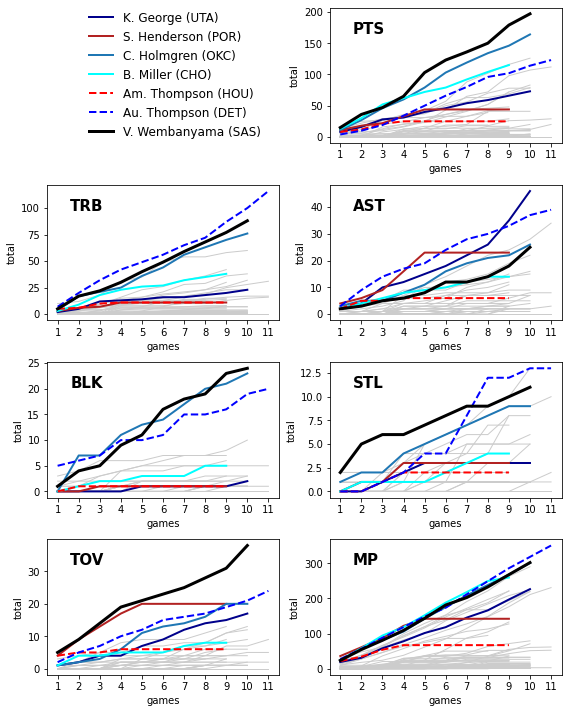

In [9]:
import matplotlib.pyplot as plt
import numpy as np

stats_to_plot = ['PTS','TRB','AST','BLK','STL','TOV','MP']



plt.figure(figsize=(8,10))

for jjj,stat in enumerate(stats_to_plot):
    
    plt.subplot(4,2,jjj+2)
    
    for rookie in all_rookie_gamelogs.keys():
        df = all_rookie_gamelogs[rookie]
        numbers = list(df[stat])
        
        if stat=='MP':
            for iii,nnn in enumerate(numbers):
                try:
                    mmm,sss = nnn.split(':')
                    numbers[iii]= float(mmm)+float(sss)/60.
                except:
                    numbers[iii]=0 
        else:
            for iii,nnn in enumerate(numbers):
                try:
                    numbers[iii]=int(nnn)
                except:
                    numbers[iii]=0  
                
          

        #print(rookie,numbers)
        game_nb = np.arange(len(numbers))+1
        
        if rookie=='wembavi01': 
            rookie_name = 'V. Wembanyama (SAS)'
            plt.plot( game_nb , np.cumsum(numbers) , c='k' , lw=3 , zorder=10, label=rookie_name)
        elif rookie=='holmgch01':
            rookie_name = 'C. Holmgren (OKC)'
            plt.plot( game_nb , np.cumsum(numbers) , c='C0' , lw=2, zorder=10, label=rookie_name)
        elif rookie=='hendesc01': 
            rookie_name = 'S. Henderson (POR)'
            plt.plot( game_nb , np.cumsum(numbers) , c='firebrick' , lw=2, zorder=10, label=rookie_name)            
        elif rookie=='millebr02':
            rookie_name = 'B. Miller (CHO)'
            plt.plot( game_nb , np.cumsum(numbers) , c='cyan' , lw=2, zorder=10, label=rookie_name)             
        elif rookie=='thompau01':
            rookie_name = 'Au. Thompson (DET)'
            plt.plot( game_nb , np.cumsum(numbers) , '--', c='b' , lw=2, zorder=10, label=rookie_name)   
        elif rookie=='thompam01':
            rookie_name = 'Am. Thompson (HOU)'
            plt.plot( game_nb , np.cumsum(numbers) , '--', c='r' , lw=2, zorder=10, label=rookie_name) 
        elif rookie=='georgke01':
            rookie_name = 'K. George (UTA)'
            plt.plot( game_nb , np.cumsum(numbers) , '-', c='darkblue' , lw=2, zorder=10, label=rookie_name)              
            
            
        else:
            plt.plot( game_nb , np.cumsum(numbers) , c='#CCCCCC' , lw=1, zorder=1)
        
    xmin,xmax = plt.gca().get_xlim()
    xticks = np.arange( 0 , int(xmax) , 1 ) + 1
    plt.gca().set_xticks( xticks )
    plt.xlabel('games')
    plt.ylabel('total')
    plt.text(0.1, 0.9, stat, fontsize=15, fontweight='bold',
             horizontalalignment='left', verticalalignment='top', transform = plt.gca().transAxes )
    
    # save this subplot so we can later add a legend outside to the left:
    if jjj==0:
        ax0 = plt.gca()

    
plt.tight_layout()
ax0.legend( fontsize=12, bbox_to_anchor=(-0.25, 1.05) , frameon=False )
# if we add a legend then call plt.tight_layout() it will create a gap in the centre,
# so we have to do it in this order.

Instead of totals, let's look at averages per game played. 

In [17]:
total_games_played = np.cumsum( np.array([n/n if n>0 else 0 for n in numbers ]) )

In [28]:
total_games_played

array([0., 0., 0., 0., 0., 0., 0., 0., 1.])

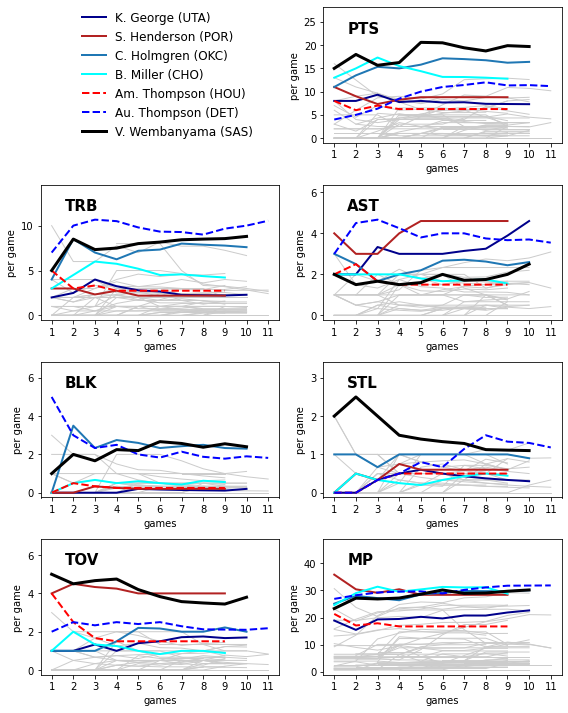

In [45]:
import matplotlib.pyplot as plt
import numpy as np

stats_to_plot = ['PTS','TRB','AST','BLK','STL','TOV','MP']



plt.figure(figsize=(8,10))

for jjj,stat in enumerate(stats_to_plot):
    
    plt.subplot(4,2,jjj+2)
    
    for rookie in all_rookie_gamelogs.keys():
        df = all_rookie_gamelogs[rookie]
        numbers = list(df[stat])
        
        
        # Find games with >0 minutes:
        minutes_played = list(df['MP'])
        for iii,nnn in enumerate(minutes_played):
            try:
                mmm,sss = nnn.split(':')
                minutes_played[iii]= float(mmm)+float(sss)/60.
            except:
                minutes_played[iii]=0 
        total_games_played = np.cumsum( np.array([n/n if n>0 else 0 for n in minutes_played ]) )
        
        
        
        if stat=='MP':
            for iii,nnn in enumerate(numbers):
                try:
                    mmm,sss = nnn.split(':')
                    numbers[iii]= float(mmm)+float(sss)/60.
                except:
                    numbers[iii]=0 
        else:
            for iii,nnn in enumerate(numbers):
                try:
                    numbers[iii]=int(nnn)
                except:
                    numbers[iii]=0  
                
          

        #print(rookie,numbers)
        game_nb = np.arange(len(numbers))+1
        
        #catch the warnings caused by players with zero games played: 
        with np.errstate(divide='ignore', invalid='ignore'):
            numbers_per_game = np.cumsum(numbers)/total_games_played
        
        if rookie=='wembavi01': 
            rookie_name = 'V. Wembanyama (SAS)'
            plt.plot( game_nb , numbers_per_game , c='k' , lw=3 , zorder=10, label=rookie_name)
        elif rookie=='holmgch01':
            rookie_name = 'C. Holmgren (OKC)'
            plt.plot( game_nb , numbers_per_game , c='C0' , lw=2, zorder=10, label=rookie_name)
        elif rookie=='hendesc01': 
            rookie_name = 'S. Henderson (POR)'
            plt.plot( game_nb , numbers_per_game , c='firebrick' , lw=2, zorder=10, label=rookie_name)            
        elif rookie=='millebr02':
            rookie_name = 'B. Miller (CHO)'
            plt.plot( game_nb , numbers_per_game , c='cyan' , lw=2, zorder=10, label=rookie_name)             
        elif rookie=='thompau01':
            rookie_name = 'Au. Thompson (DET)'
            plt.plot( game_nb , numbers_per_game , '--', c='b' , lw=2, zorder=10, label=rookie_name)   
        elif rookie=='thompam01':
            rookie_name = 'Am. Thompson (HOU)'
            plt.plot( game_nb , numbers_per_game , '--', c='r' , lw=2, zorder=10, label=rookie_name) 
        elif rookie=='georgke01':
            rookie_name = 'K. George (UTA)'
            plt.plot( game_nb , numbers_per_game , '-', c='darkblue' , lw=2, zorder=10, label=rookie_name)              
            
            
        else:
            plt.plot( game_nb , numbers_per_game , c='#CCCCCC' , lw=1, zorder=1)
        
    xmin,xmax = plt.gca().get_xlim()
    xticks = np.arange( 0 , int(xmax) , 1 ) + 1
    plt.gca().set_xticks( xticks )
    plt.xlabel('games')
    plt.ylabel('per game')

    
    # save this subplot so we can later add a legend outside to the left:
    if jjj==0:
        ax0 = plt.gca()
        
    # expand y-axis before writing stat name:
    ylims = plt.gca().get_ylim()
    plt.ylim( ylims[0] , 1.3*ylims[1] )
    plt.text(0.1, 0.9, stat, fontsize=15, fontweight='bold',
         horizontalalignment='left', verticalalignment='top', transform = plt.gca().transAxes )

    
plt.tight_layout()
ax0.legend( fontsize=12, bbox_to_anchor=(-0.25, 1.05) , frameon=False )
# if we add a legend then call plt.tight_layout() it will create a gap in the centre,
# so we have to do it in this order.